In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

movies=pd.read_csv("movierating/movie.csv")
ratings=pd.read_csv("movierating/rating.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [3]:
movies.head()
# movies.info()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# movies.isna().sum()
# ratings.isna().sum()
# print(ratings.duplicated().sum())
print(movies.duplicated(subset=["movieId"]).sum())

0


In [5]:
data=pd.merge(ratings,movies,on="movieId")
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
# Extract Year from title
movies["year"]=movies.title.str.extract(r'\((\d{4})\)').astype("Int64")
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [7]:
# Extract clean string title from title
movies["title_clean"]=movies.title.str.replace(r"\s*\(\d{4}\)$","",regex=True)
movies.head()

,movieId,title,genres,year,title_clean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


In [8]:
movies["genre_list"]=movies.genres.str.split("|")
movies_exploded=movies.explode("genre_list").rename(columns={"genre_list":"genre"})
# movies.head()
movies_exploded["genre"]=movies_exploded["genre"].replace("(no genres listed)", np.nan)
movies_exploded.head()

,movieId,title,genres,year,title_clean,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Children
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Comedy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,Fantasy


In [9]:
movies.head()

,movieId,title,genres,year,title_clean,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Jumanji,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,[Comedy]


In [10]:
ratings["datetime"] = pd.to_datetime(ratings["timestamp"])
ratings["rating_year"] = ratings["datetime"].dt.year

ratings.head()

,userId,movieId,rating,timestamp,datetime,rating_year
0,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005
1,1,29,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16,2005
2,1,32,3.5,2005-04-02 23:33:39,2005-04-02 23:33:39,2005
3,1,47,3.5,2005-04-02 23:32:07,2005-04-02 23:32:07,2005
4,1,50,3.5,2005-04-02 23:29:40,2005-04-02 23:29:40,2005


In [11]:
ratings.describe()

,userId,movieId,rating,datetime,rating_year
count,2.000026e+07,2.000026e+07,2.000026e+07,20000263,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,2004-11-20 02:32:01.677113984,2.004379e+03
min,1.000000e+00,1.000000e+00,5.000000e-01,1995-01-09 11:46:44,1.995000e+03
25%,3.439500e+04,9.020000e+02,3.000000e+00,2000-08-20 18:55:45,2.000000e+03
50%,6.914100e+04,2.167000e+03,3.500000e+00,2004-12-20 15:18:06,2.004000e+03
75%,1.036370e+05,4.770000e+03,4.000000e+00,2008-11-02 16:11:57.500000,2.008000e+03
max,1.384930e+05,1.312620e+05,5.000000e+00,2015-03-31 06:40:02,2.015000e+03
std,4.003863e+04,1.978948e+04,1.051989e+00,NaN,5.176947e+00


In [15]:
sample=ratings.head(10000)
data=sample.merge(movies_exploded[["movieId","title_clean","year","genre"]],on="movieId",how="left")
data.head()

,userId,movieId,rating,timestamp,datetime,rating_year,title_clean,year,genre
0,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005,Jumanji,1995,Adventure
1,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005,Jumanji,1995,Children
2,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005,Jumanji,1995,Fantasy
3,1,29,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16,2005,"City of Lost Children, The (Cité des enfants p...",1995,Adventure
4,1,29,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16,2005,"City of Lost Children, The (Cité des enfants p...",1995,Drama


In [16]:
n_users = data["userId"].nunique()
n_movies = data["movieId"].nunique()
n_ratings = len(data)
print(n_users, n_movies, n_ratings)

# Rating distribution
data["rating"].value_counts().sort_index()

91 2889 26767


rating
0.5     283
1.0     786
1.5     205
2.0    1697
2.5     681
3.0    6083
3.5    1873
4.0    7894
4.5    2097
5.0    5168
Name: count, dtype: int64

In [17]:
data

,userId,movieId,rating,timestamp,datetime,rating_year,title_clean,year,genre
0,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005,Jumanji,1995,Adventure
1,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005,Jumanji,1995,Children
2,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47,2005,Jumanji,1995,Fantasy
3,1,29,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16,2005,"City of Lost Children, The (Cité des enfants p...",1995,Adventure
4,1,29,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16,2005,"City of Lost Children, The (Cité des enfants p...",1995,Drama
...,...,...,...,...,...,...,...,...,...
26762,91,2890,2.5,2005-04-11 07:01:41,2005-04-11 07:01:41,2005,Three Kings,1999,Action
26763,91,2890,2.5,2005-04-11 07:01:41,2005-04-11 07:01:41,2005,Three Kings,1999,Adventure
26764,91,2890,2.5,2005-04-11 07:01:41,2005-04-11 07:01:41,2005,Three Kings,1999,Comedy
26765,91,2890,2.5,2005-04-11 07:01:41,2005-04-11 07:01:41,2005,Three Kings,1999,Drama


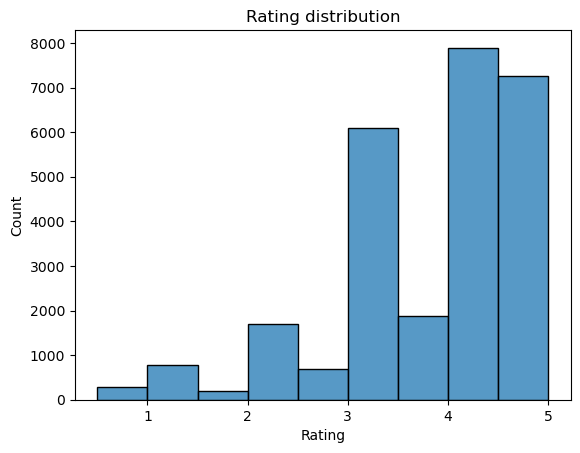

In [18]:
# Histogram of ratings
sns.histplot(data["rating"], bins=np.arange(0.5, 5.5, 0.5), kde=False)
plt.title("Rating distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()



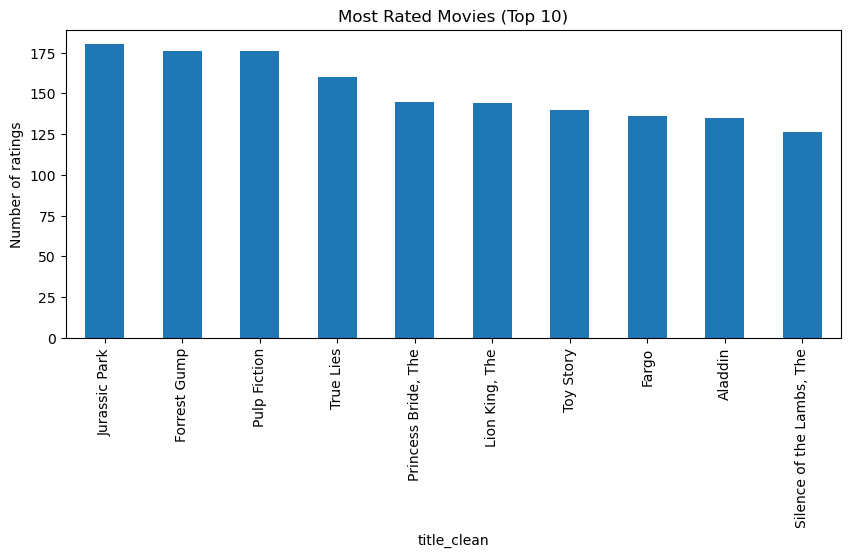

<Figure size 640x480 with 0 Axes>

In [45]:
# Top 10 most rated movies
movie_counts = data.groupby("title_clean")["rating"].count().sort_values(ascending=False).head(10)
movie_counts.plot(kind="bar", figsize=(10,4))
plt.title("Most Rated Movies (Top 10)")
plt.ylabel("Number of ratings")
plt.show()
plt.savefig("preview_top_movies.png") 

In [22]:
avg_by_genre=data.groupby("genre")["rating"].mean().sort_values(ascending=False)
avg_by_genre

genre
IMAX           4.066514
Film-Noir      4.031646
War            3.928094
Documentary    3.914894
Animation      3.825427
Drama          3.786546
Mystery        3.765292
Crime          3.754135
Western        3.706967
Fantasy        3.691509
Adventure      3.659042
Thriller       3.632082
Musical        3.630117
Sci-Fi         3.628311
Children       3.607587
Romance        3.603224
Action         3.588325
Horror         3.549803
Comedy         3.498658
Name: rating, dtype: float64

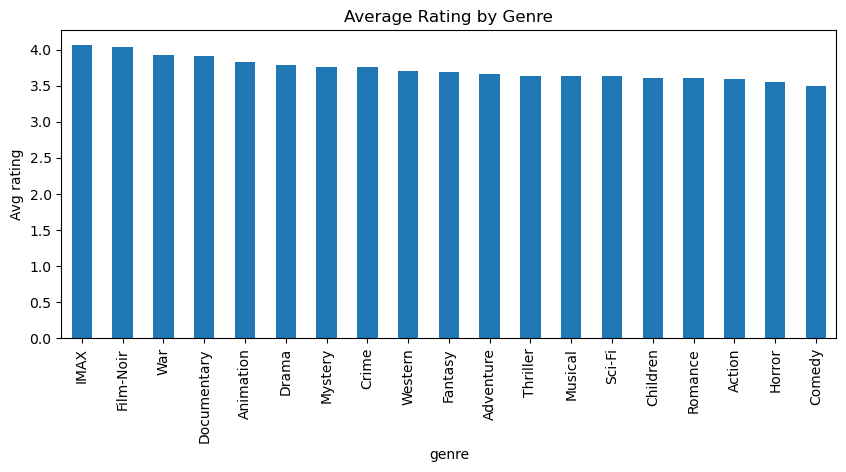

In [26]:
avg_by_genre.plot(kind="bar", figsize=(10,4))
plt.title("Average Rating by Genre")
plt.ylabel("Avg rating")
plt.show()

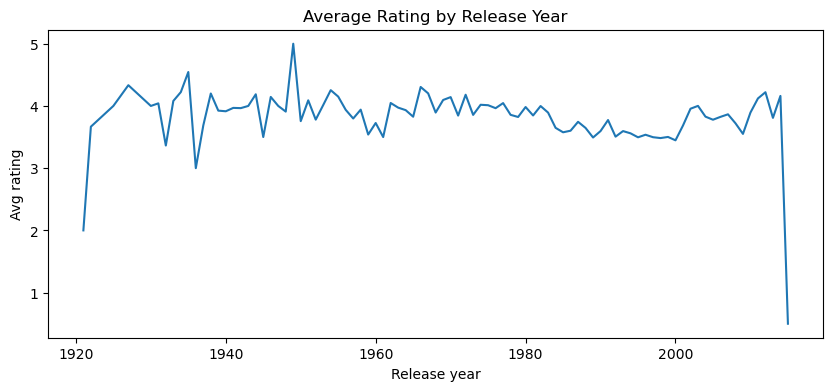

In [27]:
avg_by_release_year = data.groupby("year")["rating"].mean().dropna()
avg_by_release_year.plot(figsize=(10,4))
plt.title("Average Rating by Release Year")
plt.ylabel("Avg rating")
plt.xlabel("Release year")
plt.show()

In [29]:
decade=(data.year//10)*10
tmp=data.assign(decade=decade)
pivot_genre_decade=tmp.pivot_table(values="rating",index="genre",columns="decade",aggfunc="mean")
pivot_genre_decade

decade,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
genre,,,,,,,,,,
Action,NaN,4.250000,NaN,3.888889,4.056818,3.918519,3.734403,3.387895,3.732595,3.976190
Adventure,NaN,3.857143,4.000000,4.000000,3.940594,3.866142,3.693000,3.442308,3.833641,4.010000
Animation,NaN,3.687500,3.708333,3.656250,3.657895,4.038462,3.792683,3.779545,3.929825,3.866667
Children,NaN,3.710526,3.708333,3.593750,3.542857,3.618421,3.581897,3.490085,3.803763,3.941176
Comedy,3.000000,4.041667,4.083333,3.976190,3.837662,3.944444,3.552215,3.426449,3.455607,3.637500
Crime,NaN,4.750000,4.333333,4.078947,4.083333,4.281553,3.605882,3.678347,3.798535,4.428571
Documentary,NaN,NaN,NaN,NaN,NaN,NaN,4.142857,4.175676,3.635417,5.000000
Drama,3.750000,4.066667,4.000000,4.000000,4.069536,4.102823,3.798960,3.688998,3.827607,4.182540
Fantasy,NaN,3.785714,3.980769,3.678571,3.547619,3.847826,3.688053,3.433252,3.970690,4.017857


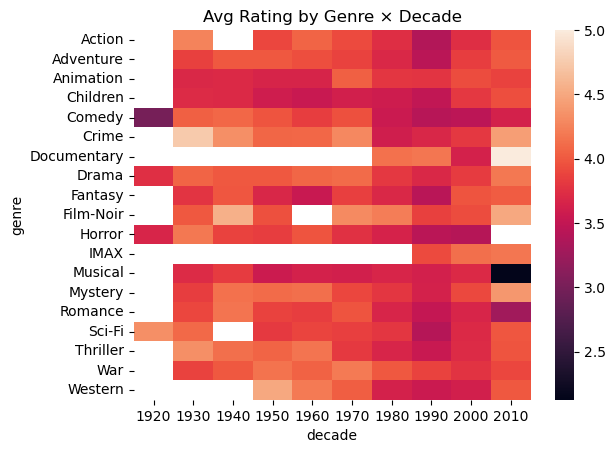

In [31]:
sns.heatmap(pivot_genre_decade,annot=False)
plt.title("Avg Rating by Genre × Decade")
plt.show()

In [36]:
movie_stat=(data.groupby("title_clean")

                        .agg(avg_rating=("rating","mean"),
                             n_rating=("rating","count"),
                             year=("year","first")
                        ).sort_values(["avg_rating","n_rating"],ascending=False))
top_movie=movie_stat.query("n_rating>=50").sort_values("avg_rating",ascending=False).head(20)
top_movie

,avg_rating,n_rating,year
title_clean,,,
Star Wars: Episode V - The Empire Strikes Back,4.517857,84,1980
"Shawshank Redemption, The",4.511905,84,1994
Apocalypse Now,4.472222,54,1979
"Lord of the Rings: The Return of the King, The",4.428571,56,2003
"Usual Suspects, The",4.410714,84,1995
Gladiator,4.388889,54,2000
Life Is Beautiful (La Vita è bella),4.375000,64,1997
"Sixth Sense, The",4.375000,60,1999
Schindler's List,4.306452,62,1993


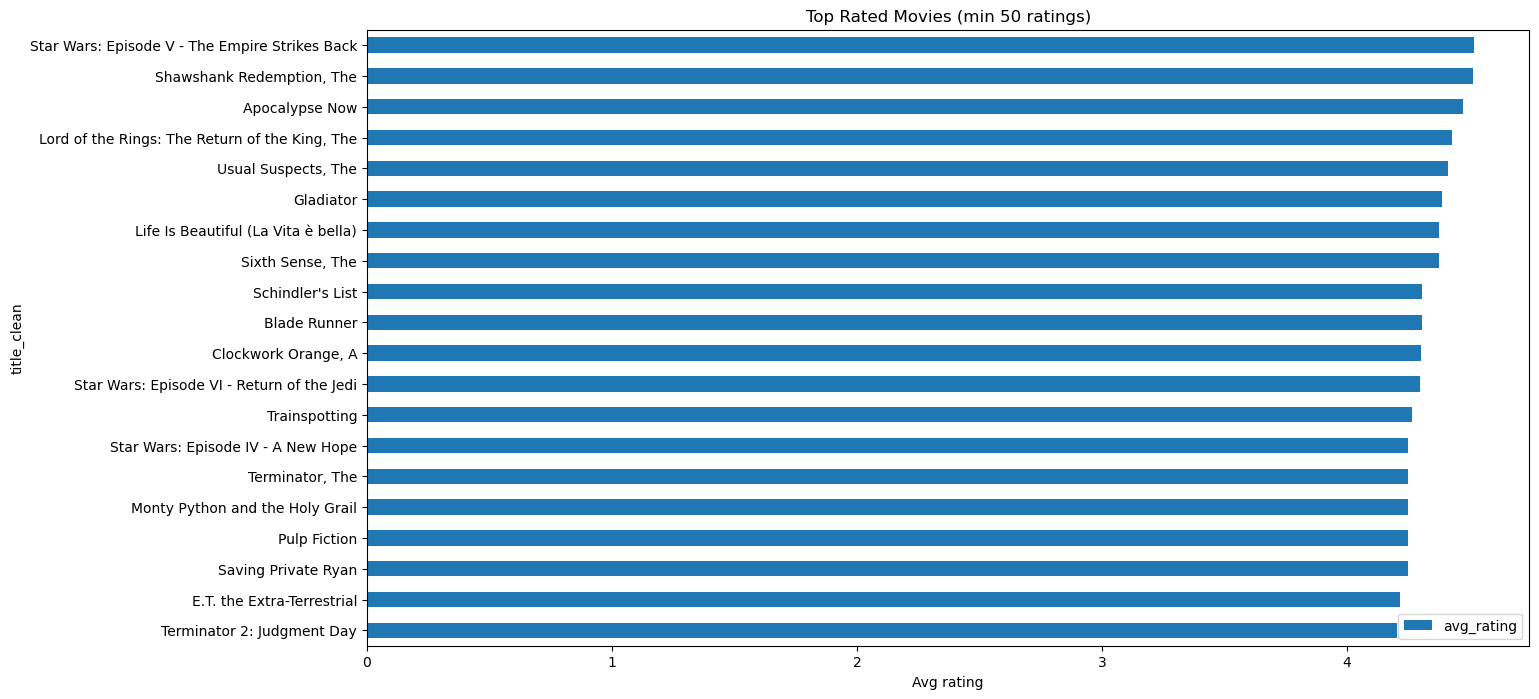

In [40]:
top_movie.sort_values("avg_rating").plot(y="avg_rating", kind="barh", figsize=(15,8))
plt.title("Top Rated Movies (min 50 ratings)")
plt.xlabel("Avg rating")
plt.show()

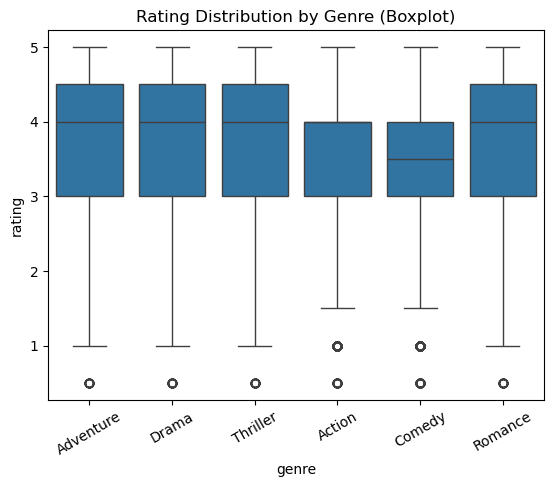

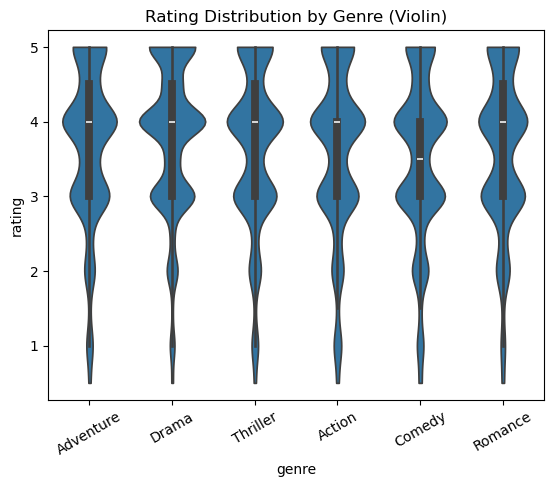

<Figure size 640x480 with 0 Axes>

In [44]:
# Sample a few popular genres for readability
popular_genres = (data["genre"].value_counts().head(6).index.tolist())
subset = data[data["genre"].isin(popular_genres)]

sns.boxplot(data=subset, x="genre", y="rating")
plt.title("Rating Distribution by Genre (Boxplot)")
plt.xticks(rotation=30)
plt.show()

sns.violinplot(data=subset, x="genre", y="rating", cut=0)
plt.title("Rating Distribution by Genre (Violin)")
plt.xticks(rotation=30)
plt.show()
plt.savefig("preview_ratings_dist.png")  